# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


>**The Movie Database (TMDb):**
>contains information about 10,000 movies from 1960 and 2015 With 10866 >number of observation and 21 features that include ...
```id, imdb_id, popularity	budget, revenue, original_title, cast, homepage, director, tagline,	..., overview, runtime, genres, production_companies and revenue_adj
```
>We will try to analyze it and understand its features related    relations







In [23]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import operator
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling


### General Properties
>in this section we will try to Assess and clean our data 

In [24]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
print("releasing year between {} and {} With {} number of observation".format(df['release_year'].min(),df['release_year'].max(),df.shape[0]) )

releasing year between 1960 and 2015 With 10866 number of observation


In [25]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [26]:
#We need to see the null/non-null values and columns dataTypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [27]:
# Here we get a very  good statistics of the dataset
# include Count, Mean, Std, Min ,quartiles and  Max value
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning (Replace this with more specific notes!)
>We  will Drop the null and zeros rows from our datafram

In [28]:
#  Drop the null rows
df.dropna(inplace=True)
df.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [37]:
# Drop all rows that has a 0 values 
df = df[(df != 0).all(1)]
df.describe()


,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,1287.000000,1287.000000,1.287000e+03,1.287000e+03,1287.000000,1287.000000,1287.000000,1287.000000,1.287000e+03,1.287000e+03
mean,52557.491064,1.786022,5.200349e+07,1.762444e+08,110.273504,947.266511,6.279487,2007.017094,5.462994e+07,1.991775e+08
std,74450.077163,2.172137,5.514540e+07,2.538156e+08,18.811369,1255.476215,0.795955,8.060503,5.525463e+07,2.968515e+08
min,11.000000,0.010335,1.000000e+00,4.300000e+01,63.000000,10.000000,2.200000,1961.000000,9.693980e-01,4.300000e+01
25%,5851.500000,0.664783,1.400000e+07,2.565097e+07,97.000000,179.000000,5.800000,2005.000000,1.519180e+07,2.764890e+07
50%,20178.000000,1.152354,3.200000e+07,8.208716e+07,107.000000,439.000000,6.300000,2009.000000,3.556927e+07,8.674770e+07
75%,62209.500000,2.125342,7.000000e+07,2.140694e+08,121.000000,1173.000000,6.800000,2011.000000,7.630125e+07,2.351178e+08
max,333348.000000,32.985763,4.250000e+08,2.781506e+09,201.000000,9767.000000,8.300000,2015.000000,4.250000e+08,2.827124e+09


<a id='eda'></a>
## Exploratory Data Analysis

>According to the Observation behavior will try to answer the following questions:
* Which genres are most popular from year to year?
* What kinds of properties are associated with movies that have high revenues?
* what is the number of movies every production company participated in?

### Which genres are most popular from year to year?

In [125]:
def year_genres(year):
    #Group the Dataset by release_year
    df_groupby_years = df.groupby('release_year')
    # Create a list of all genres of year for every movie
    genres_lis = []
    for genre in df_groupby_years.get_group(year).genres.str.split('|'):
        genres_lis.extend(genre)
        
    # Create a unique set of the execting genres
    Catigory = set(genres_lis)
    counterOf_Catigory = {}

    for n in Catigory:
        counterOf_Catigory[n] = genres_lis.count(n)
    return counterOf_Catigory

In [126]:
year = 2015
results = max(year_genres(year).items(), key=operator.itemgetter(1))
print("The most popular in '{}' is '{}' with '{}' filme".format(year,results[0],results[1]))


The most popular in '2015' is 'Drama' with '69' filme


In [127]:
year = 2014
results = max(year_genres(year).items(), key=operator.itemgetter(1))
print("The most popular in '{}' is '{}' with '{}' filme".format(year,results[0],results[1]))


The most popular in '2014' is 'Drama' with '58' filme


In [128]:
year = 2013
results = max(year_genres(year).items(), key=operator.itemgetter(1))
print("The most popular in '{}' is '{}' with '{}' filme".format(year,results[0],results[1]))


The most popular in '2013' is 'Drama' with '47' filme


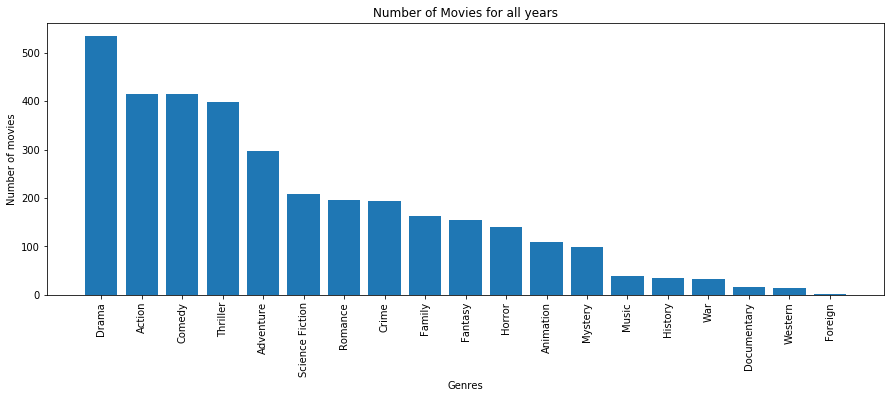

In [38]:
#For All year
genres_lis = []
for gen in df.genres.str.split('|'):
    genres_lis.extend(gen)
        
# Create a unique set of the execting genres
Catigory = set(genres_lis)
counterOf_Catigory = {}

for n in Catigory:
    counterOf_Catigory[n] = genres_lis.count(n)
        
# Plot a bar
counterOf_Catigory = {k: v for k, v in sorted(counterOf_Catigory.items(), key=lambda item: item[1], reverse=True)}
plt.figure(figsize= (15,5))
plt.bar(counterOf_Catigory.keys(), counterOf_Catigory.values(), align='center')
plt.xticks(rotation = 'vertical')
plt.xlabel('Genres')
plt.ylabel('Number of movies')
plt.title('Number of Movies for all years')
plt.show()


### What kinds of properties are associated with movies that have high revenues?

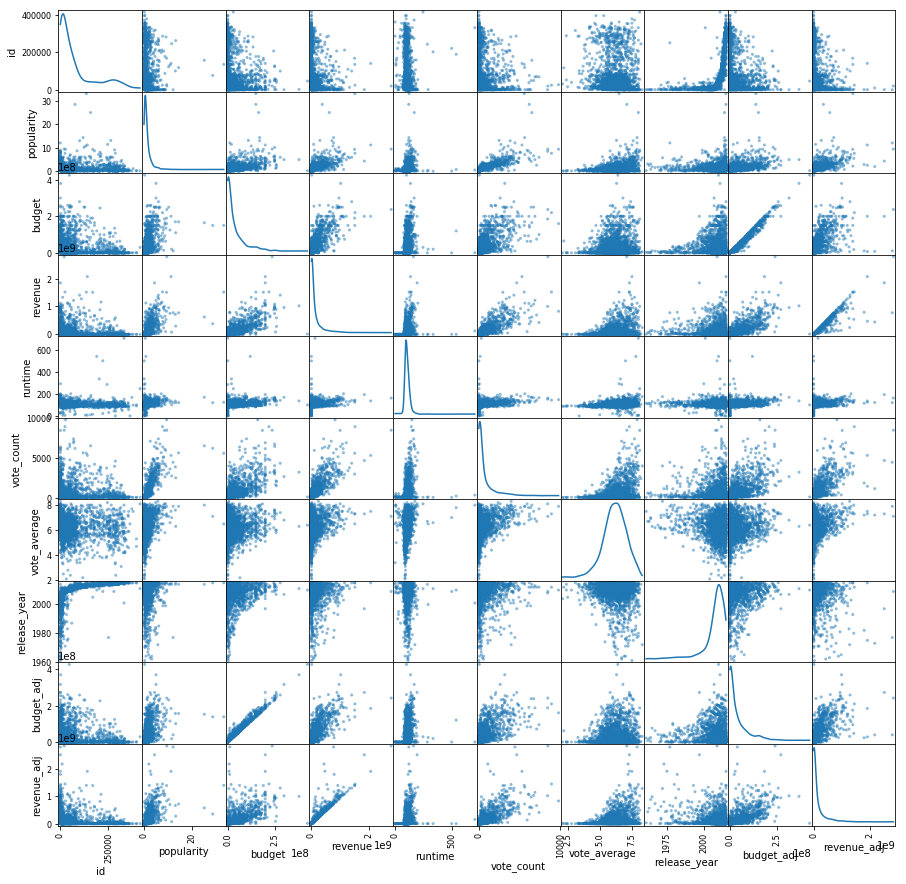

In [109]:
# scatter_matrix plot to know the correlation between the features and itself 
pd.plotting.scatter_matrix(df, figsize=(15,15), diagonal='kde')[0][0]

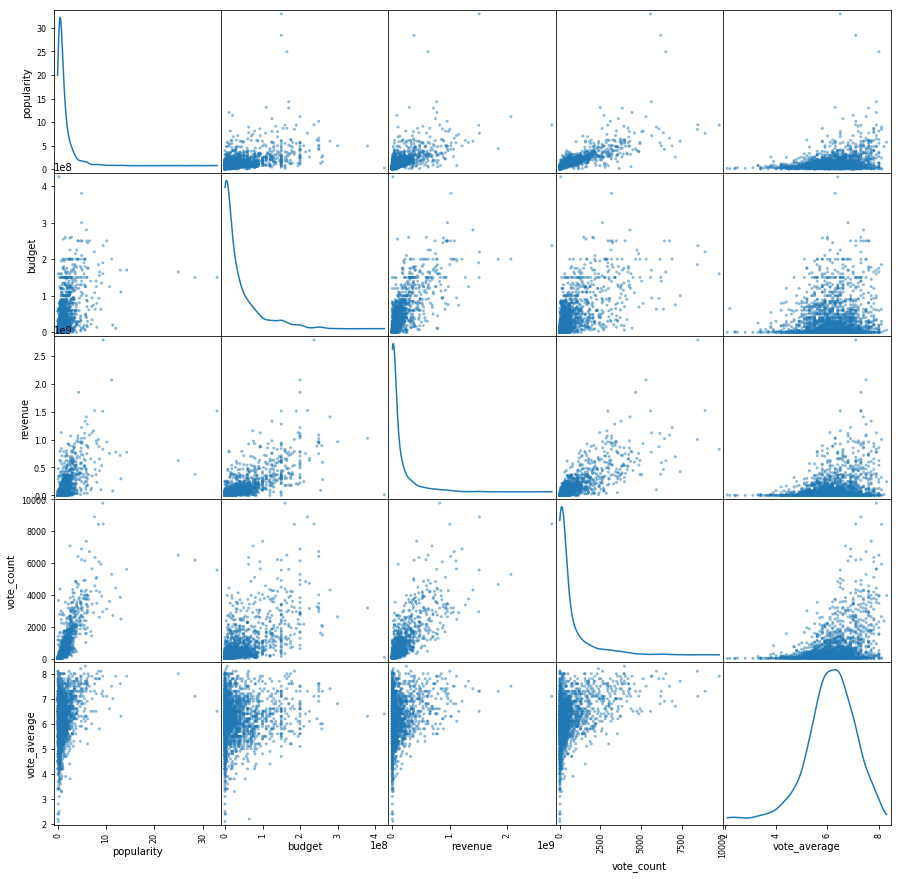

In [115]:
#For more accurate we will delete some non important feature
df_modified = df.drop(['release_year', 'runtime','id','keywords','tagline','overview','budget_adj','revenue_adj'], axis = 1)
pd.plotting.scatter_matrix(df_modified, figsize=(15,15), diagonal='kde')[0][0]

Text(0, 0.5, 'vote_count')


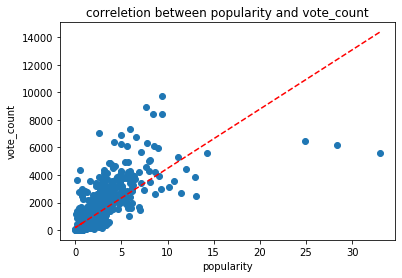

In [52]:
# Here we focus on the correletion between popularity and vote_count
x = df['popularity']
y = df['vote_count']
plt.scatter(x,y)

#draw the trend line
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.title("correletion between popularity and vote_count")
plt.xlabel("popularity")
plt.ylabel("vote_count")
plt.show()

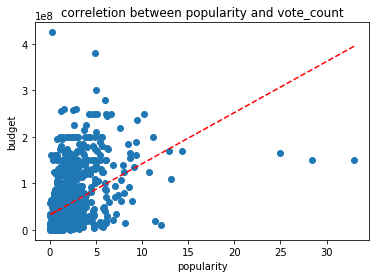

In [54]:
# Here we focus on the correletion between popularity and budget
x = df['popularity']
y = df['budget']
plt.scatter(x,y)

#draw the trend line
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.title("correletion between popularity and vote_count")
plt.xlabel("popularity")
plt.ylabel("budget")
plt.show()

 The upper graph is  a correlation between popularity and some other  specific  feature as a try to observe the behavior of it with other features

<a id='conclusions'></a>
## Conclusions

>According to our obsevation on the TMDb-movies 

> 1- The Drama category is the most common category through the years from 1960 to 2015.

> 2- The positive correlation between the popularity and the (budget, vote_count) isn't enough and  need more  data  to make  a decisions.But general the vote count is known as an effective feature in populari
Congratulations!

>the  dataset consists of the American movies  which doesn't include  the compititors  in the same field  in another countries So any result will out will be  spacific to the USA American pepols so other country cant take this result in much conserned

In [57]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0